In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


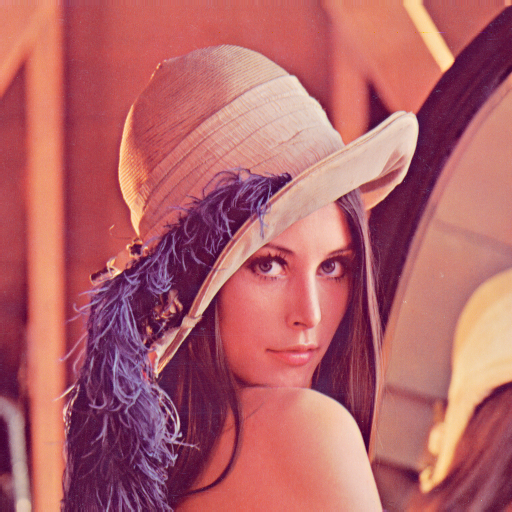

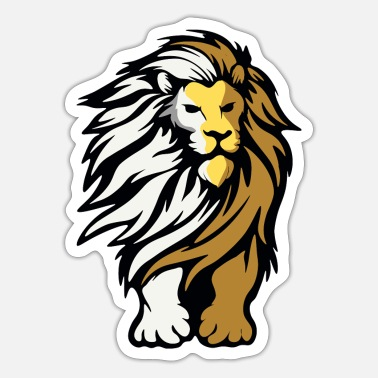

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Load images
carrier_image = cv2.imread("/content/drive/MyDrive/watermark/carrier_image.png")
watermarked_image = cv2.imread("/content/drive/MyDrive/watermark/watermarked_image.jpg")

cv2_imshow(carrier_image)
cv2_imshow(watermarked_image)

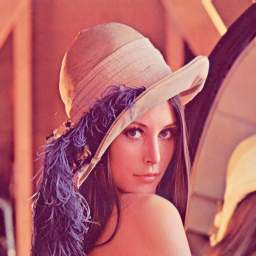

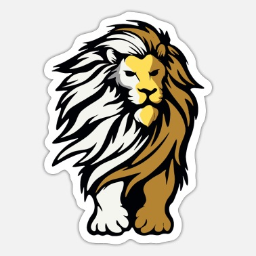

In [ ]:
# Function to apply preprocessing to an image
def resize_image(image):
    # Resize the image to a specific size (e.g., 256x256)
    resized_image = cv2.resize(image, (256, 256))
    return resized_image

# Apply preprocessing to the images
resized_carrier_image = resize_image(carrier_image)
resized_watermarked_image = resize_image(watermarked_image)

# Display the preprocessed images
cv2_imshow(resized_carrier_image)
cv2_imshow(resized_watermarked_image)

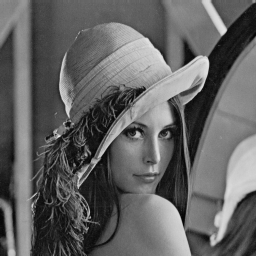

In [ ]:
# Split the resized carrier image into its RGB channels
b, g, r = cv2.split(resized_carrier_image)

# Select the green channel
green_channel = g

# Display the green channel
cv2_imshow(green_channel)


In [ ]:
# Find the RGB values of the red channel
red_channel = r
red_values = cv2.mean(red_channel)
print("Red channel RGB values:", red_values)

# Find the RGB values of the blue channel
blue_channel = b
blue_values = cv2.mean(blue_channel)
print("Blue channel RGB values:", blue_values)

# Find the RGB values of the green channel
green_values = cv2.mean(green_channel)
print("Green channel RGB values:", green_values)


Red channel RGB values: (180.34982299804688, 0.0, 0.0, 0.0)
Blue channel RGB values: (105.53598022460938, 0.0, 0.0, 0.0)
Green channel RGB values: (99.17778015136719, 0.0, 0.0, 0.0)


In [ ]:
import numpy as np

# Define the block size
block_size = 16

# Get the dimensions of the green channel
height, width = green_channel.shape

# Calculate the number of blocks in each dimension
num_blocks_height = height // block_size
num_blocks_width = width // block_size

# Create an empty list to store the blocks
blocks = []

# Iterate over each block
for i in range(num_blocks_height):
    for j in range(num_blocks_width):
        # Calculate the coordinates of the current block
        y_start = i * block_size
        y_end = (i + 1) * block_size
        x_start = j * block_size
        x_end = (j + 1) * block_size

        # Extract the block from the green channel
        block = green_channel[y_start:y_end, x_start:x_end]

        # Append the block to the list
        blocks.append(block)

# Convert the list of blocks to a numpy array
blocks = np.array(blocks)

# Display the shape of the blocks array
print("Shape of blocks array:", blocks.shape)


Shape of blocks array: (256, 16, 16)


In [ ]:
import numpy as np

# Define the function for the Catalan transform
def catalan_transform(block):
    # Calculate the average pixel value of the block
    avg_pixel_value = np.mean(block)

    # Apply the Catalan transform
    transformed_block = np.where(block > avg_pixel_value, 1, 0)

    return transformed_block

# Iterate through each block
catalan_coefficients = []

for block in blocks:
    # Apply the Catalan transform to the block
    transformed_block = catalan_transform(block)

    # Calculate the Catalan coefficient
    catalan_coefficient = np.sum(transformed_block) / (block_size ** 2)

    # Append the Catalan coefficient to the list
    catalan_coefficients.append(catalan_coefficient)

# Convert the list of Catalan coefficients to a numpy array
catalan_coefficients = np.array(catalan_coefficients)

# Display the Catalan coefficients
print("Catalan coefficients:", catalan_coefficients)


Catalan coefficients: [0.47265625 0.69140625 0.57421875 0.5546875  0.52734375 0.46484375
 0.53125    0.4296875  0.48828125 0.63671875 0.58984375 0.48046875
 0.2109375  0.40625    0.4375     0.51953125 0.72265625 0.70703125
 0.5859375  0.5625     0.51171875 0.24609375 0.48046875 0.515625
 0.14453125 0.53125    0.5078125  0.53515625 0.4609375  0.515625
 0.51171875 0.48828125 0.4453125  0.640625   0.609375   0.53515625
 0.4375     0.5078125  0.41015625 0.56640625 0.67578125 0.3046875
 0.5078125  0.66015625 0.40625    0.69921875 0.33984375 0.3125
 0.2109375  0.65234375 0.625      0.32421875 0.22265625 0.51171875
 0.3203125  0.640625   0.53125    0.70703125 0.53125    0.484375
 0.453125   0.171875   0.1640625  0.62890625 0.21484375 0.62890625
 0.6328125  0.2265625  0.3359375  0.421875   0.484375   0.51953125
 0.4921875  0.5390625  0.63671875 0.7890625  0.79296875 0.19140625
 0.67578125 0.546875   0.265625   0.67578125 0.64453125 0.2890625
 0.4296875  0.5625     0.5390625  0.515625   0.53515

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Assuming catalan_coefficients contains your Catalan coefficients
X = catalan_coefficients.reshape(-1, 1)  # Reshape to a column vector
y = np.random.rand(len(X), 1)  # Dummy target values, since we're not doing regression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Extract features from the trained model
features = mlp.predict(X_train_scaled)  # Use the training data for feature extraction

# Print the extracted features
print("Extracted features:", features)


Extracted features: [0.53474669 0.46081563 0.49104836 0.39271632 0.45375965 0.59451136
 0.40556509 0.43642724 0.53258336 0.54753694 0.54033837 0.3987728
 0.49536637 0.3987728  0.57523265 0.44925439 0.40117625 0.46058349
 0.50615069 0.46762126 0.47116666 0.5083204  0.45750541 0.49536637
 0.47394022 0.47546849 0.40556509 0.39151977 0.47116666 0.49536637
 0.39057446 0.42658431 0.39906671 0.44052893 0.46058349 0.40267485
 0.47809432 0.59840257 0.41464082 0.46058349 0.42323736 0.40267485
 0.7198909  0.40030017 0.4295187  0.38915838 0.5458287  0.41056392
 0.52252443 0.60229378 0.41768077 0.78507435 0.57523265 0.41933637
 0.41768077 0.44925439 0.41983048 0.75294104 0.59451136 0.45723343
 0.5715594  0.53258336 0.46421844 0.38915838 0.40117625 0.46393355
 0.53474669 0.50400239 0.46081563 0.41933637 0.42421508 0.75312261
 0.56053963 0.47116666 0.39775442 0.39641444 0.40372875 0.46421844
 0.47028981 0.45361712 0.78635433 0.43683432 0.47028981 0.41056392
 0.44052893 0.41493056 0.40030017 0.5744632

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import numpy as np
from sklearn.decomposition import NMF

# Assuming 'features' contains the extracted features from the MLPRegressor

# Reshape the features array to make it 2D
features_2d = np.reshape(features, (-1, 1))

# Define the number of components (desired number of features)
n_components = 100

# Apply NMF
nmf = NMF(n_components=n_components, init='random', random_state=0)
multiple_feature_matrix = nmf.fit_transform(features_2d)

# Calculate the reconstruction error for each feature
reconstruction_errors = []
for feature_idx in range(n_components):
    reconstructed_features = np.dot(multiple_feature_matrix[:, feature_idx].reshape(-1, 1), nmf.components_[feature_idx, :].reshape(1, -1))
    reconstruction_error = np.mean((features_2d - reconstructed_features) ** 2)
    reconstruction_errors.append(reconstruction_error)

# Find the index of the feature with the lowest reconstruction error
best_feature_idx = np.argmin(reconstruction_errors)
best_feature = nmf.components_[best_feature_idx, :]

print("Best feature:", best_feature)

Best feature: [0.12284857]


In [ ]:
# alpha =0.1
# # Reshape the watermarked image to match the best feature size
# resized_watermarked_image = cv2.resize(watermarked_image, (best_feature.size, 1))

# # Convert the watermarked image to floating point representation
# resized_watermarked_image = resized_watermarked_image.astype(np.float32)

# # Perform alpha blending
# embedded_image = alpha * resized_watermarked_image + (1 - alpha) * (best_feature.reshape(1, -1) * 255)

# # Clip the pixel values to ensure they are within the valid range
# embedded_image = np.clip(embedded_image, 0, 255)

# # Convert the embedded image back to uint8
# embedded_image = embedded_image.astype(np.uint8)

# # Display the embedded image
# cv2_imshow(embedded_image)

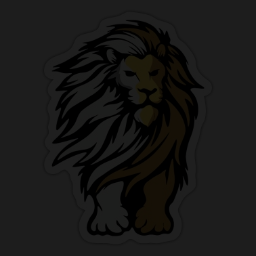

In [ ]:
# Perform element-wise multiplication to embed the watermarked image on the best feature
embedded_image = resized_watermarked_image * best_feature.reshape(1, -1)

# # Display the embedded image
cv2_imshow(embedded_image)



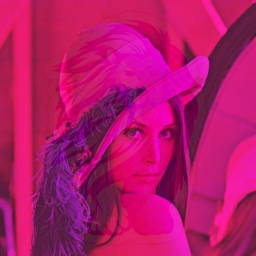

In [ ]:
import numpy as np

# Create new images with three channels by stacking the red and blue channels
red_channel_rgb = np.stack((r,) * 3, axis=-1)
blue_channel_rgb = np.stack((b,) * 3, axis=-1)

# Merge the red, green, and blue channels with the embedded image in place of the green channel
merged_image = np.zeros_like(resized_carrier_image)  # Create an empty image with the same size as the carrier image
merged_image[:,:,0] = blue_channel_rgb[:,:,0]  # Blue channel
merged_image[:,:,1] = embedded_image[:,:,0]  # Embedded image (replacing green channel)
merged_image[:,:,2] = red_channel_rgb[:,:,2]  # Red channel

# Display the scaled merged image
cv2_imshow(merged_image)



In [ ]:
# Split the merged image into its RGB channels
b_merged, g_merged, r_merged = cv2.split(merged_image)

# Find the RGB values of the red channel in the merged image
red_values_merged = cv2.mean(r_merged)
print("Red channel RGB values in merged image:", red_values_merged)

# Find the RGB values of the blue channel in the merged image
blue_values_merged = cv2.mean(b_merged)
print("Blue channel RGB values in merged image:", blue_values_merged)

# Find the RGB values of the green channel in the merged image
green_values_merged = cv2.mean(g_merged)
print("Green channel RGB values in merged image:", green_values_merged)


Red channel RGB values in merged image: (180.34982299804688, 0.0, 0.0, 0.0)
Blue channel RGB values in merged image: (105.53598022460938, 0.0, 0.0, 0.0)
Green channel RGB values in merged image: (22.311614990234375, 0.0, 0.0, 0.0)
